In [2]:
#from __future__ import division, print_function
import matplotlib.pyplot as plt
import bilby
import numpy as np

import time

from bilby.core.prior import Uniform
#from bilby.gw.conversion import convert_to_lal_binary_black_hole_parameters, generate_all_bbh_parameters
%matplotlib inline

import hphc7

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

In [3]:
outdir = 'outdir_new_model'
label = 'create_your_own_source_model'
sampling_frequency = 1024.
duration = 4.

In [4]:
# Here we define our source model - this is the sine-Gaussian model in the
# frequency domain.
def eccentric_waveform(frequency_array, mass_1, mass_2, eccentricity, luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec, **kwargs):
    
    N = len(frequency_array)
    h_plus = np.zeros(N)*1j
    h_cross = np.zeros(N)*1j
    
    fmin = 20.0
    fmax = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
    
    k = 0
    for f in frequency_array:
        if f>=fmin and f<=fmax:        
            arg_plus = {'iota_':theta_jn, 'beta_':psi, 'D_':luminosity_distance , 'm1_':mass_1, 'm2_':mass_2, 'f_':f, 'f0_':20.0, 'Fp_':1.0, 'Fc_':0.0, 'et0_':eccentricity, 'phic_':phase, 'tc_':geocent_time}

            fplus = hphc7.Fn(**arg_plus)
            
            h_plus[k] = fplus.htilde()[0]
            h_cross[k] = fplus.htilde()[1]
            
        k=k+1

    return {'plus': h_plus, 'cross': h_cross}

In [5]:
# Set up a random seed for result reproducibility.
np.random.seed(1234)

In [7]:
# We now define some parameters that we will inject
injection_parameters = dict(mass_1=35.0, mass_2=30.0, eccentricity=0.1, luminosity_distance=440.0, theta_jn=0.4, psi=0.1, phase=1.2, geocent_time=1180002601.0, ra=1.375, dec=-1.2108)

In [8]:
waveform_arguments = dict(waveform_approximant='IMRPhenomPv2',
                          reference_frequency=50., minimum_frequency=20., catch_waveform_errors=True)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=eccentric_waveform, parameters=injection_parameters, waveform_arguments=waveform_arguments
)

19:17 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: __main__.eccentric_waveform
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [9]:
# Set up interferometers.
minimum_frequency = 20.0+5.0
MM1 = 35.0
MM2 = 30.0
maximum_frequency = (C**3)/( G*(MM1+MM2)*Mo*np.pi*6**(3/2) )-5.0

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time'] - 2)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
19:18 bilby INFO    : Injected signal in H1:
19:18 bilby INFO    :   optimal SNR = 49.69
19:18 bilby INFO    :   matched filter SNR = 49.28+0.74j
19:18 bilby INFO    :   mass_1 = 35.0
19:18 bilby INFO    :   mass_2 = 30.0
19:18 bilby INFO    :   eccentricity = 0.1
19:18 bilby INFO    :   luminosity_distance = 440.0
19:18 bilby INFO    :   theta_jn = 0.4
19:18 bilby INFO    :   psi = 0.1
19:18 bilby INFO    :   phase = 1.2
19:18 bilby INFO    :   geocent_time = 1180002601.0
19:18 bilby INFO    :   ra = 1.375
19:18 bilby INFO    :   dec = -1.2108
19:18 bilby INFO    : Injected signal in L1:
19:18 bilby INFO    :   optimal SNR = 39.29
19:18 bilby INFO    :   matched filter SNR = 39.32-0.87j
19:18 bilby INFO    :   mass_1 = 

[{'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

19:19 bilby INFO    : Injected signal in H1:
19:19 bilby INFO    :   optimal SNR = 49.69
19:19 bilby INFO    :   matched filter SNR = 148.66+0.74j
19:19 bilby INFO    :   mass_1 = 35.0
19:19 bilby INFO    :   mass_2 = 30.0
19:19 bilby INFO    :   eccentricity = 0.1
19:19 bilby INFO    :   luminosity_distance = 440.0
19:19 bilby INFO    :   theta_jn = 0.4
19:19 bilby INFO    :   psi = 0.1
19:19 bilby INFO    :   phase = 1.2
19:19 bilby INFO    :   geocent_time = 1180002601.0
19:19 bilby INFO    :   ra = 1.375
19:19 bilby INFO    :   dec = -1.2108
19:19 bilby INFO    : Injected signal in L1:
19:19 bilby INFO    :   optimal SNR = 39.29
19:19 bilby INFO    :   matched filter SNR = 117.89-0.87j
19:19 bilby INFO    :   mass_1 = 35.0
19:19 bilby INFO    :   mass_2 = 30.0
19:19 bilby INFO    :   eccentricity = 0.1
19:19 bilby INFO    :   luminosity_distance = 440.0
19:19 bilby INFO    :   theta_jn = 0.4
19:19 bilby INFO    :   psi = 0.1
19:19 bilby INFO    :   phase = 1.2
19:19 bilby INFO    :

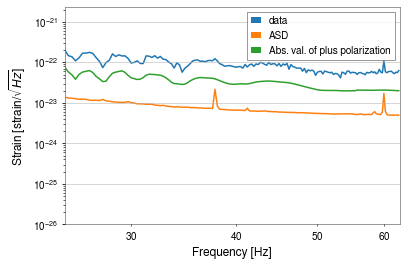

In [18]:
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)
H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Abs. val. of plus polarization")

ax.set_xlim(minimum_frequency,maximum_frequency)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [19]:
#injection_parameters = dict(mass_1=35.0, mass_2=30.0, eccentricity=0.1, luminosity_distance=440.0, 
#theta_jn=0.4, psi=0.1, phase=1.2, geocent_time=1180002601.0, ra=1.375, dec=-1.2108)
prior = bilby.core.prior.PriorDict()
prior["mass_1"] = 35.
prior["mass_2"] = 30.
prior["eccentricity"] = bilby.core.prior.LogUniform(
    name='eccentricity', latex_label='$e$', minimum=0.01, maximum=0.4)
prior["luminosity_distance"] = 440.
prior["theta_jn"] = 0.4
prior["psi"] = 0.1
prior["phase"] = 1.2
prior["geocent_time"] = 1180002601.0
prior["ra"] = 1.375
prior["dec"] = -1.2108


In [20]:
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator, priors=prior,
    time_marginalization=False, phase_marginalization=False, distance_marginalization=False)

In [21]:
result_short = bilby.run_sampler(
    likelihood, prior, sampler='dynesty', outdir='short', label="GW150914",
    nlive=500, dlogz=3,  # <- Arguments are used to make things fast - not recommended for general use
    clean=True
)


19:19 bilby INFO    : Running for label 'GW150914', output will be saved to 'short'
19:19 bilby INFO    : Using lal version 6.21.0
19:19 bilby INFO    : Using lal git version Branch: None;Tag: lal-v6.21.0;Id: 37caf89936b637993c30b3076fe4b853311873ee;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
19:19 bilby INFO    : Using lalsimulation version 1.10.0
19:19 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsimulation-v1.10.0;Id: 5bfe091197594d55cf634f8a1c004eb9dc9b6459;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
19:19 bilby INFO    : Search parameters:
19:19 bilby INFO    :   eccentricity = LogUniform(minimum=0.01, maximum=0.4, name='eccentricity', latex_label='$e$', unit=None, boundary=None)
19:19 bilby INFO    :   mass_1 = 35.0
19:19 bilby INFO    :   mass_2 = 30.0
19:19 bilby INFO    :   luminosity_distance = 440.0
19:19 bilby INFO    :   theta_jn = 0.4
19:19

KeyboardInterrupt: 

In [17]:
len(result_short.samples)

1779

In [15]:
#bilby.gw.source.lal_binary_black_hole
ff=np.arange(0,1024,1)
t0 = time.time()
bilby.gw.source.lal_binary_black_hole(frequency_array=ff,mass_1=36., mass_2=29., a_1=0.4, a_2=0.3, tilt_1=0.5, tilt_2=1.0,
    phi_12=1.7, phi_jl=0.3, luminosity_distance=4000., theta_jn=0.4, psi=2.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)
t1 = time.time()
print('Execution took {:.4f}'.format(t1 - t0))

Execution took 0.0054


In [17]:
ff=np.arange(0,1024,1)
t0 = time.time()
eccentric_waveform(ff, 35.0 ,30.0 , 0.1, 440.0, 0.4, 0.1, 1.2, 1180002601.0, 1.375, -1.2108)
t1 = time.time()
print('Execution took {:.4f}'.format(t1 - t0))

Execution took 2.1336
